In [9]:
import re
import string
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import os

# Functie om tekst op te schonen
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Verwijder HTML-tags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Verwijder URL's
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Verwijder leestekens
    text = text.lower()  # Zet om naar kleine letters
    return text

# Custom stopwoordenlijst die rekening houdt met technische termen
technical_stopwords = list(set(stopwords.words('dutch')) - {"monteur", "installatie", "elektro", "zonnepanelen"})

# Vectorisatie met TF-IDF en aangepaste stopwoordenlijst
vectorizer = TfidfVectorizer(stop_words=technical_stopwords, max_features=1000)

#load orignal data
data_set_name = "BastianLewisData"
data_dir = r"C:\Users\peter\Projects\HR_Forecasting\data"
file_path = os.path.join(data_dir,'BastianLewisData.xlsx')
df = pd.read_excel(file_path,sheet_name='Result 1')

# Combineer alle tekstvelden voor eenvoud
df['combined_text'] = df['Motivatie'] + " " + df['Meest trotste project'] + " " + df['Huidig/Laatste functie']
df.fillna('',inplace=True)
# Tekst opschonen
df['cleaned_text'] = df['combined_text'].apply(clean_text)

# Feature Extraction met TF-IDF
X = vectorizer.fit_transform(df['cleaned_text'])

# Labels
y = df['starter']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelleren met een Random Forest Classifier
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

# Voorspellingen en evaluatie
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1952
           1       0.12      0.08      0.10        37

    accuracy                           0.97      1989
   macro avg       0.55      0.53      0.54      1989
weighted avg       0.97      0.97      0.97      1989



In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
# Oversampling met SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Modelleren met een Random Forest Classifier en class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)

# Voorspellingen en evaluatie
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1952
           1       0.12      0.08      0.10        37

    accuracy                           0.97      1989
   macro avg       0.55      0.53      0.54      1989
weighted avg       0.97      0.97      0.97      1989

ROC AUC Score: 0.553264842711564


In [14]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelleren met een Balanced Random Forest Classifier
model = BalancedRandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Voorspellingen en evaluatie
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1952
           1       0.05      0.14      0.08        37

    accuracy                           0.94      1989
   macro avg       0.52      0.54      0.52      1989
weighted avg       0.97      0.94      0.95      1989

ROC AUC Score: 0.5700736597252991


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import RFE
import os
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


def plot_classification_report(classification_report, cmap='coolwarm'):
    """
    Plots a heatmap of a classification report.
    
    Parameters:
    classification_report (dict): The classification report as a dictionary, typically output from sklearn.metrics.classification_report.
    cmap (str): The colormap for the heatmap. Default is 'coolwarm'.
    """
    # Convert the classification report to a DataFrame
    report_df = pd.DataFrame(classification_report).transpose()
    
    # Set the plot size
    plt.figure(figsize=(10, 5))
    
    # Plot the heatmap
    sns.heatmap(report_df, annot=True, cmap=cmap, fmt='.2f', linewidths=.5, cbar_kws={'label': 'Score'})
    
    # Set the labels and title
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.title('Classification Report')
    
    # Display the plot
    plt.show()

In [16]:
class_names = ['dropout','starter']

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1952
           1       0.05      0.14      0.08        37

    accuracy                           0.94      1989
   macro avg       0.52      0.54      0.52      1989
weighted avg       0.97      0.94      0.95      1989



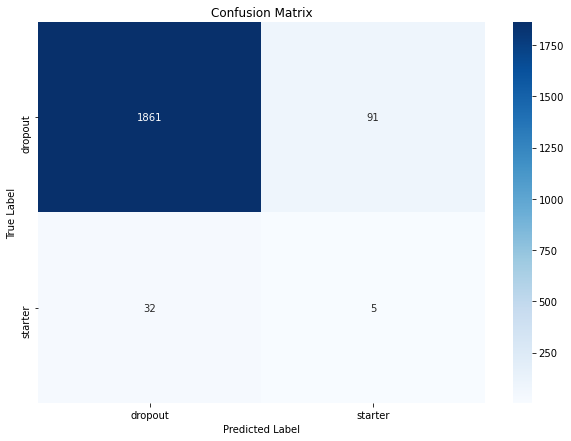

In [17]:
# Evaluate the model
print('Classification Report:')
cr = classification_report(y_test, y_pred)
print(cr)


# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names)

In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier

# Veronderstel dat je een DataFrame 'df' hebt met zowel tabeldata als tekstdata
text_features =['Motivatie','Meest trotste project','Huidig/Laatste functie']
table_features = ['leeftijd', 'ervaring_jaren', 'opleiding_niveau']  # Veronderstelde tabelfeatures

# Stap 1: Tekstvectorisatie
text_vectorizer = TfidfVectorizer(stop_words=technical_stopwords, max_features=1000)
text_pipeline = ColumnTransformer(
    transformers=[
        ('text', text_vectorizer, 'combined_text')
    ],
    remainder='passthrough'
)

# Stap 2: Combineer tekst en tabel data
combined_pipeline = FeatureUnion(
    transformer_list=[
        ('text_pipeline', text_pipeline),
        ('table_data', 'passthrough')
    ]
)

# Veronderstel dat df_tabel alleen de tabel features bevat en dat df_text de tekstfeatures bevat
df['combined_text'] = df['motivatie'] + " " + df['meest_trotse_project'] + " " + df['huidige_laatste_functie']

# Split de tabel en tekst features
X_table = df[table_features]
X_text = text_pipeline.fit_transform(df)

# Combineer beide sets van features
X_combined = np.hstack((X_text.toarray(), X_table.values))

# Labels
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train een Balanced Random Forest op de gecombineerde data
model = BalancedRandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Voorspellingen en evaluatie
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
